In [1]:
from preamble import *
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline

#한글 출력 오류시 추가

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/H2GTRM.TTF").get_name()
rc('font', family=font_name)

In [2]:
#샘플 데이터 생성
#두 개의 특징을 가진 이진 분류 데이터셋
X,y = mglearn.datasets.make_forge()

X.shape: (26, 2)


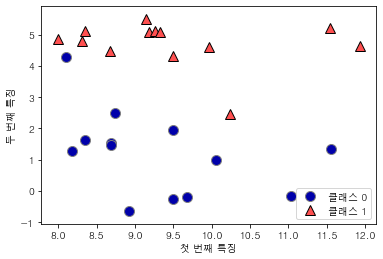

In [3]:
#데이터 형태 보기
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc = 4)
plt.xlabel("첫 번째 특징")
plt.ylabel("두 번째 특징")
print("X.shape: {}".format(X.shape))

In [4]:
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_forge()
#데이터 로드

In [5]:
print("X.shape:{}".format(X.shape), "y.shape:{}".format(y.shape))
#훈련/테스트 분할
X_train, X_test, y_train, y_test = train_test_split (X, y, random_state = 0)
# KNN 분류기를 가져옴
from sklearn.neighbors import KNeighborsClassifier
# 이웃 수가 3이라고 설정
clf = KNeighborsClassifier(n_neighbors=3)

X.shape:(26, 2) y.shape:(26,)


In [6]:
clf.fit(X_train, y_train)
#훈련기 학습

KNeighborsClassifier(n_neighbors=3)

In [7]:
print("테스트 세트 예측:{}".format(clf.predict(X_test)))
#테스트 데이터
print("테스트 세트 정확도 : {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 예측:[1 0 1 0 1 0 0]
테스트 세트 정확도 : 0.86


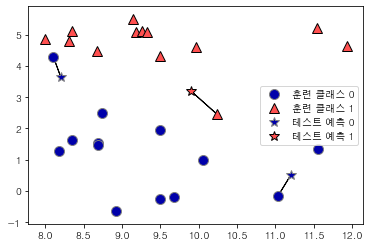

In [8]:
mglearn.plots.plot_knn_classification(n_neighbors=1)
#이웃의 수가 1
#훈련값에서 가장 가까운 값 하나를 찾는다

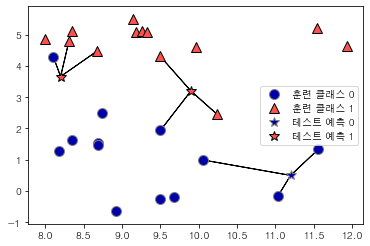

In [9]:
mglearn.plots.plot_knn_classification(n_neighbors=3)
#이웃의 수가 3
#훈련값에서 가장 가까운 값 세개를 찾는다

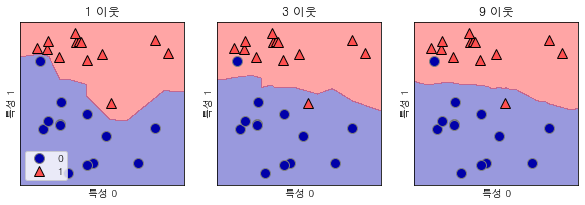

In [11]:
# 이웃 수에 따른 결정 경계
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
    
axes[0].legend(loc=3)

In [12]:
#유방암 데이터 불러오기
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [13]:
print("데이터의 형태 : ", cancer.data.shape)

데이터의 형태 :  (569, 30)


In [14]:
print("클래스별 샘플 갯수 : \n", {n : v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스별 샘플 갯수 : 
 {'malignant': 212, 'benign': 357}


In [15]:
print("특성 이름 : \n", cancer.feature_names)

특성 이름 : 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [26]:
#유방암 데이터 훈련/테스트 분할
X_train, X_test, y_train, y_test = train_test_split (cancer.data, cancer.target, stratify=cancer.target, random_state = 66)

In [23]:
training_accuracy = []
test_accuracy = []

In [27]:
neighbors_settings = range(1,11)
#1에서 10까지 n_neighbors를 적용

for n_neighbors in neighbors_settings:
    #모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    #훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    #일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))

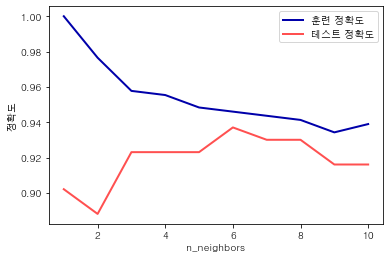

In [30]:
plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()